In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/onlineretail/OnlineRetail.csv


In [2]:
import numpy as np
import pandas as pd
import datetime as dt

pd.set_option('display.max_columns', None)
pd.set_option('display.float_format', lambda x: '%.5f' % x)

import matplotlib.pyplot as plt
import squarify
import seaborn as sns


import os
print(os.listdir('../input/'))


import warnings
warnings.filterwarnings("ignore")
warnings.simplefilter(action='ignore', category=FutureWarning)

['onlineretail']


# read data

In [3]:
df = pd.read_csv('../input/onlineretail/OnlineRetail.csv', encoding = 'unicode_escape')
print(df.shape)
df.head()

(541909, 8)


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55000,17850.00000,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39000,17850.00000,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75000,17850.00000,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39000,17850.00000,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39000,17850.00000,United Kingdom


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


# Data Preperation

In [5]:
df.dropna(inplace=True)
# there are negative values on Quantity variable, this is caused by the refund invoices (Invoices containing the letter "C"), reassign df without refund invoices
df = df[~df["InvoiceNo"].str.contains("C", na=False)]

In [6]:
df.describe([0.01, 0.05, 0.10, 0.25, 0.50, 0.75, 0.90, 0.95, 0.99]).T

,count,mean,std,min,1%,5%,10%,25%,50%,75%,90%,95%,99%,max
Quantity,397924.00000,13.02182,180.42021,1.00000,1.00000,1.00000,1.00000,2.00000,6.00000,12.00000,24.00000,36.00000,120.00000,80995.00000
UnitPrice,397924.00000,3.11617,22.09679,0.00000,0.21000,0.42000,0.55000,1.25000,1.95000,3.75000,6.35000,8.50000,14.95000,8142.75000
CustomerID,397924.00000,15294.31517,1713.16988,12346.00000,12415.00000,12627.00000,12883.00000,13969.00000,15159.00000,16795.00000,17725.00000,17912.00000,18211.00000,18287.00000


#### negative values are excluded. We are not removing outliers (such as the max value on Quantity and Price variables)

# data visualization

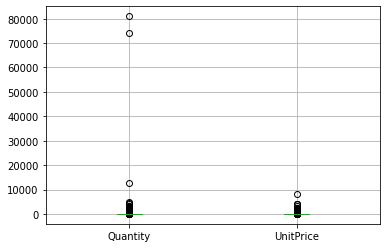

In [7]:
df[["Quantity", "UnitPrice"]].boxplot();

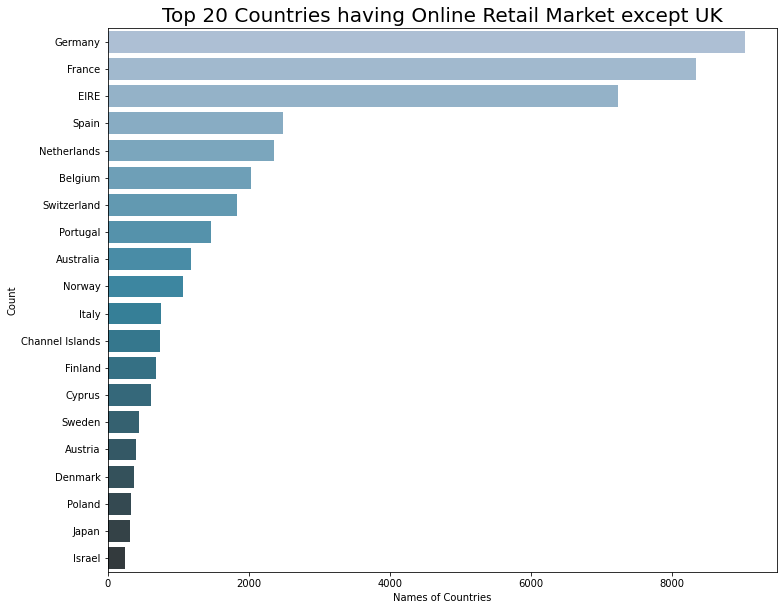

In [8]:
# checking the different values for country in the dataset

plt.rcParams['figure.figsize'] = (12, 10)
a = df['Country'].value_counts().head(21)[1:]
sns.barplot(x = a.values, y = a.index, palette = 'PuBuGn_d')
plt.title('Top 20 Countries having Online Retail Market except UK', fontsize = 20)
plt.xlabel('Names of Countries')
plt.ylabel('Count')
plt.show()

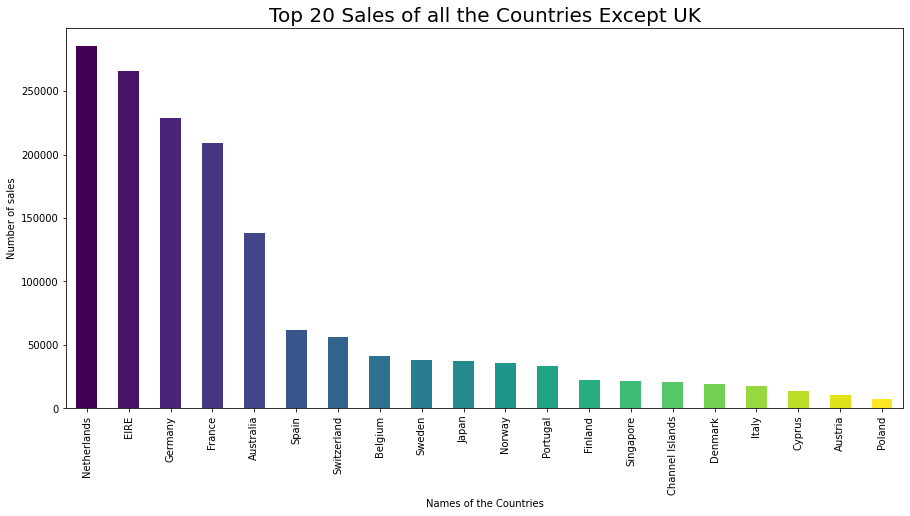

In [9]:
# looking at each country's sales
color = plt.cm.viridis(np.linspace(0, 1, 20))
df['Sales'] = df['UnitPrice'] * df['Quantity']
df['Sales'].groupby(df['Country']).agg('sum').sort_values(ascending = False).head(21)[1:].plot.bar(figsize = (15, 7),color = color)
#sns.barplot(x = b.values, y = b.index, palette = 'magma')
plt.title('Top 20 Sales of all the Countries Except UK', fontsize = 20)
plt.xlabel('Names of the Countries')
plt.ylabel('Number of sales')
plt.show()

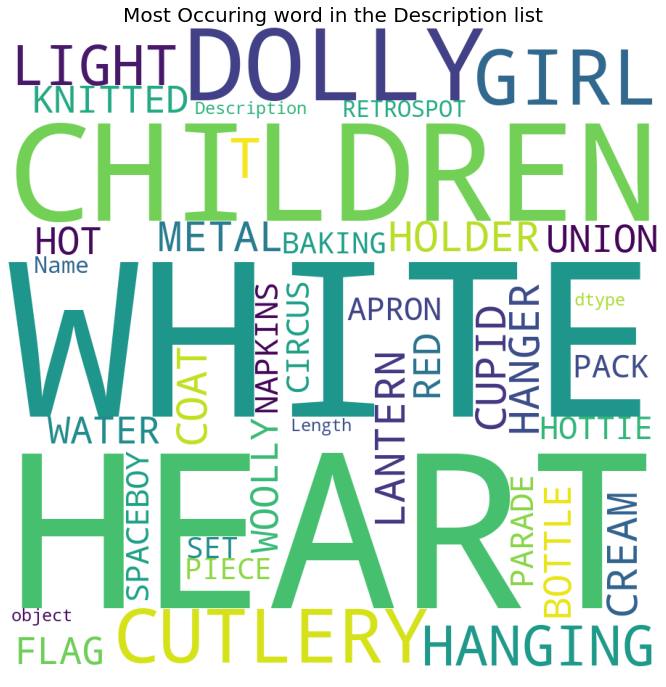

In [10]:
from wordcloud import WordCloud
from wordcloud import STOPWORDS

stopwords = set(STOPWORDS)
wordcloud = WordCloud(background_color = 'white', width = 900, height = 900).generate(str(df['Description']))

print(wordcloud)
plt.rcParams['figure.figsize'] = (12, 12)
plt.axis('off')
plt.imshow(wordcloud)
plt.title('Most Occuring word in the Description list', fontsize = 20)
plt.show()

In [11]:
# checking how many unique customer IDs and different number of unique countriesare there

x = df['CustomerID'].nunique()
y = df['Country'].nunique()

# printing the value
print("There are {} number of different customers".format(x))
print("There are {} number of different countries who do online retailing from UK".format(y))


There are 4339 number of different customers
There are 37 number of different countries who do online retailing from UK


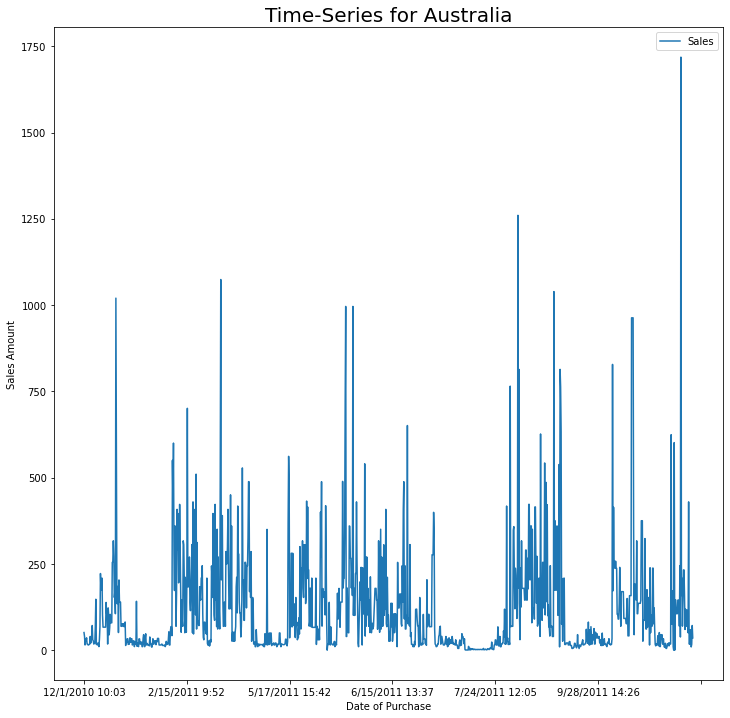

In [12]:
# time-series plot for Australia

dataset = df[df['Country'] == 'Australia']
dataset.plot(x = 'InvoiceDate', y = 'Sales')
plt.title('Time-Series for Australia', fontsize = 20)
plt.xlabel('Date of Purchase')
plt.ylabel('Sales Amount')
plt.show()

# Cohort Analysis

In [13]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
df.head(2)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Sales
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55000,17850.00000,United Kingdom,15.30000
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39000,17850.00000,United Kingdom,20.34000


In [14]:
#creating invoice month column to see first month when customer purchased 
df['InvoiceMonth'] = df['InvoiceDate'].apply(lambda x: dt.datetime(x.year, x.month, 1))

#assign smallest invoice value to each customer
df['CohortMonth'] = df.groupby('CustomerID')['InvoiceMonth'].transform('min')
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Sales,InvoiceMonth,CohortMonth
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55000,17850.00000,United Kingdom,15.30000,2010-12-01,2010-12-01
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39000,17850.00000,United Kingdom,20.34000,2010-12-01,2010-12-01
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75000,17850.00000,United Kingdom,22.00000,2010-12-01,2010-12-01
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39000,17850.00000,United Kingdom,20.34000,2010-12-01,2010-12-01
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39000,17850.00000,United Kingdom,20.34000,2010-12-01,2010-12-01


In [15]:
#function to extract year, month, day as integers
def get_date_int(df, column):
    year = df[column].dt.year
    month = df[column].dt.month
    day = df[column].dt.day
    return year, month, day

In [16]:
#extract month
invoice_year, invoice_month, _ = get_date_int(df, 'InvoiceMonth')
cohort_year, cohort_month, _ = get_date_int(df, 'CohortMonth')

In [17]:
years_diff = invoice_year - cohort_year
months_diff = invoice_month - cohort_month

In [18]:
# Extract the difference in days from all previous values
df['CohortIndex'] = years_diff * 12 + months_diff + 1
df.head(2)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Sales,InvoiceMonth,CohortMonth,CohortIndex
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55000,17850.00000,United Kingdom,15.30000,2010-12-01,2010-12-01,1
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39000,17850.00000,United Kingdom,20.34000,2010-12-01,2010-12-01,1


In [19]:
#count monthly active customers from each cohort
cohort_data = df.groupby(['CohortMonth', 'CohortIndex'])['CustomerID'].apply(pd.Series.nunique).reset_index()
cohort_counts = cohort_data.pivot(index='CohortMonth', columns = 'CohortIndex', values='CustomerID')

In [20]:
#Customer retention
cohort_sizes = cohort_counts.iloc[:,0]
retention = cohort_counts.divide(cohort_sizes, axis=0)
retention = retention.round(3) * 100
retention.head(20)

CohortIndex,1,2,3,4,5,6,7,8,9,10,11,12,13
CohortMonth,,,,,,,,,,,,,
2010-12-01,100.00000,36.60000,32.30000,38.40000,36.30000,39.80000,36.30000,34.90000,35.40000,39.50000,37.40000,50.30000,26.60000
2011-01-01,100.00000,22.10000,26.60000,23.00000,32.10000,28.80000,24.70000,24.20000,30.00000,32.60000,36.50000,11.80000,NaN
2011-02-01,100.00000,18.70000,18.70000,28.40000,27.10000,24.70000,25.30000,27.90000,24.70000,30.50000,6.80000,NaN,NaN
2011-03-01,100.00000,15.00000,25.20000,19.90000,22.30000,16.80000,26.80000,23.00000,27.90000,8.60000,NaN,NaN,NaN
2011-04-01,100.00000,21.30000,20.30000,21.00000,19.70000,22.70000,21.70000,26.00000,7.30000,NaN,NaN,NaN,NaN
2011-05-01,100.00000,19.00000,17.30000,17.30000,20.80000,23.20000,26.40000,9.50000,NaN,NaN,NaN,NaN,NaN
2011-06-01,100.00000,17.40000,15.70000,26.40000,23.10000,33.50000,9.50000,NaN,NaN,NaN,NaN,NaN,NaN
2011-07-01,100.00000,18.10000,20.70000,22.30000,27.10000,11.20000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-08-01,100.00000,20.70000,24.90000,24.30000,12.40000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


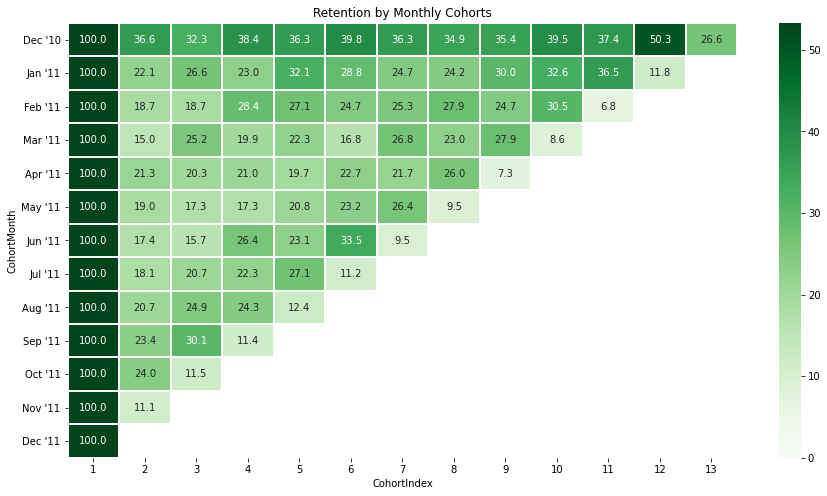

In [21]:
month_list = ["Dec '10", "Jan '11", "Feb '11", "Mar '11", "Apr '11",\
              "May '11", "Jun '11", "Jul '11", "Aug '11", "Sep '11", \
              "Oct '11", "Nov '11", "Dec '11"]

plt.figure(figsize=(15,8))
plt.title('Retention by Monthly Cohorts')
sns.heatmap(data=retention,
            annot = True,
            cmap = "Greens",
            vmin = 0.0,
            vmax = list(retention.max().sort_values(ascending = False))[1]+3,
            fmt = '.1f',
            linewidth = 0.3,
            yticklabels=month_list)

plt.show()

# RFM analysis

### create a new df called rfm in order to calculate Recency, Frequency and Monetary values.

* the number of days between the last purchase date of this customer is Recency
* the number of unique invoices of this customer is Frequency
* the sum of sales is this customer's Monetary

In [22]:
last_date = df['InvoiceDate'].max() #+ dt.timedelta(days=1)
last_date

Timestamp('2011-12-09 12:50:00')

In [23]:
rfm = df.groupby('CustomerID').agg({'InvoiceDate': lambda date: (last_date - date.max()).days,
                                    'InvoiceNo': lambda inv: inv.nunique(),
                                    'Sales': lambda price: price.sum()})
rfm.columns = ['Recency', 'Frequency', 'Monetary']
rfm.head()

,Recency,Frequency,Monetary
CustomerID,,,
12346.00000,325,1,77183.60000
12347.00000,1,7,4310.00000
12348.00000,74,4,1797.24000
12349.00000,18,1,1757.55000
12350.00000,309,1,334.40000


In [24]:
#check if there are any zeros in rfm:
rfm.describe([0.01, 0.05, 0.10, 0.25, 0.50, 0.75, 0.90, 0.95, 0.99]).T

,count,mean,std,min,1%,5%,10%,25%,50%,75%,90%,95%,99%,max
Recency,4339.00000,91.51832,100.00975,0.00000,0.00000,2.00000,4.00000,17.00000,50.00000,141.00000,262.00000,311.00000,368.00000,373.00000
Frequency,4339.00000,4.27195,7.70549,1.00000,1.00000,1.00000,1.00000,1.00000,2.00000,5.00000,9.00000,13.00000,30.00000,210.00000
Monetary,4339.00000,2053.79302,8988.24838,0.00000,52.07600,112.24500,156.56600,307.24500,674.45000,1661.64000,3646.16400,5840.18200,19880.09180,280206.02000


# RFM Scores
* the min number of Recency metric means that this customer has just purchased, so the highest score (5) should be given to the lower number of Recency.
* the max number of Frequency and Monetary metrics mean that the customer is purchasing frequently and spending more money, so the highest score (5) should be given to the highest Frequency and Monetary values.

In [25]:
rfm["RecencyScore"] = pd.qcut(rfm['Recency'], 5, labels=[5, 4, 3, 2, 1])

rfm["FrequencyScore"] = pd.qcut(rfm['Frequency'].rank(method="first"), 5, labels=[1, 2, 3, 4, 5])

rfm["MonetaryScore"] = pd.qcut(rfm['Monetary'], 5, labels=[1, 2, 3, 4, 5])

In [26]:
rfm["RFM_SCORE"] = (rfm['RecencyScore'].astype(str) +
                    rfm['FrequencyScore'].astype(str) +
                    rfm['MonetaryScore'].astype(str))

rfm.head()

,Recency,Frequency,Monetary,RecencyScore,FrequencyScore,MonetaryScore,RFM_SCORE
CustomerID,,,,,,,
12346.00000,325,1,77183.60000,1,1,5,115
12347.00000,1,7,4310.00000,5,5,5,555
12348.00000,74,4,1797.24000,2,4,4,244
12349.00000,18,1,1757.55000,4,1,4,414
12350.00000,309,1,334.40000,1,1,2,112


In [27]:
# display some of the customers with the highest scores:
rfm[rfm['RFM_SCORE'] == "555"].head()

,Recency,Frequency,Monetary,RecencyScore,FrequencyScore,MonetaryScore,RFM_SCORE
CustomerID,,,,,,,
12347.00000,1,7,4310.00000,5,5,5,555
12362.00000,2,10,5226.23000,5,5,5,555
12417.00000,2,9,3649.10000,5,5,5,555
12433.00000,0,7,13375.87000,5,5,5,555
12437.00000,1,18,4951.41000,5,5,5,555


# Naming the RFM Scores

In [28]:
# the following dict has been made according to the famous RFM graphic
seg_map = {
    r'[1-2][1-2]': 'Hibernating',      # Customer's shopped long ago but with less frequency and monetary value
    r'[1-2][3-4]': 'At_Risk',          # Customer's shopping less often now who used to shop a lot
    r'[1-2]5': 'Cant_Lose',            # Customer's shopped long ago who used to shop a lot.
    r'3[1-2]': 'About_to_Sleep',
    r'33': 'Need_Attention',           # High monetary value but good recency and frequency values
    r'[3-4][4-5]': 'Loyal_Customers',  # High frequency as well as monetary value with good recency
    r'41': 'Promising',
    r'51': 'New_Customers',            # Customer's who recently started shopping a lot but with less monetary value
    r'[4-5][2-3]': 'Potential_Loyalists', # High recency and monetary value, average frequency
    r'5[4-5]': 'Best Customers'        # Highest frequency as well as monetary value with least recenc
}

In [29]:
#we will be using Recency and Frequency scores for customer segmentation. 
#We are assuming that a customer who has recently purchased and who is often purchasing should have high RFM scores.
rfm['Segment'] = rfm['RecencyScore'].astype(str) + rfm['FrequencyScore'].astype(str)
rfm['Segment'] = rfm['Segment'].replace(seg_map, regex=True)
rfm=rfm.reset_index()
rfm.head(2)

,CustomerID,Recency,Frequency,Monetary,RecencyScore,FrequencyScore,MonetaryScore,RFM_SCORE,Segment
0,12346.00000,325,1,77183.60000,1,1,5,115,Hibernating
1,12347.00000,1,7,4310.00000,5,5,5,555,Best Customers


In [30]:
rfm[["Segment", "Recency", "Frequency", "Monetary"]].groupby("Segment").agg(["mean", "count"])

Recency       Frequency         Monetary      
                         mean count      mean count       mean count
Segment                                                             
About_to_Sleep       52.50427   351   1.16239   351  461.06151   351
At_Risk             154.06207   580   2.86552   580 1076.50643   580
Best Customers        4.87678   633  12.41706   633 6857.93548   633
Cant_Lose           131.42857    63   8.38095    63 2796.15587    63
Hibernating         216.89765  1065   1.10141  1065  487.70758  1065
Loyal_Customers      32.46917   827   6.45828   827 2856.72033   827
Need_Attention       52.06452   186   2.32796   186  889.22640   186
New_Customers         5.85714    42   1.00000    42  388.21286    42
Potential_Loyalists  16.12398   492   2.01016   492 1034.90547   492
Promising            22.35000   100   1.00000   100  351.79780   100

In [31]:
rfm.head()

,CustomerID,Recency,Frequency,Monetary,RecencyScore,FrequencyScore,MonetaryScore,RFM_SCORE,Segment
0,12346.00000,325,1,77183.60000,1,1,5,115,Hibernating
1,12347.00000,1,7,4310.00000,5,5,5,555,Best Customers
2,12348.00000,74,4,1797.24000,2,4,4,244,At_Risk
3,12349.00000,18,1,1757.55000,4,1,4,414,Promising
4,12350.00000,309,1,334.40000,1,1,2,112,Hibernating


In [32]:
retail_rfm_segments = rfm.groupby('Segment')['CustomerID'].count().reset_index(name='counts')
retail_rfm_segments.head(15)

,Segment,counts
0,About_to_Sleep,351
1,At_Risk,580
2,Best Customers,633
3,Cant_Lose,63
4,Hibernating,1065
5,Loyal_Customers,827
6,Need_Attention,186
7,New_Customers,42
8,Potential_Loyalists,492
9,Promising,100


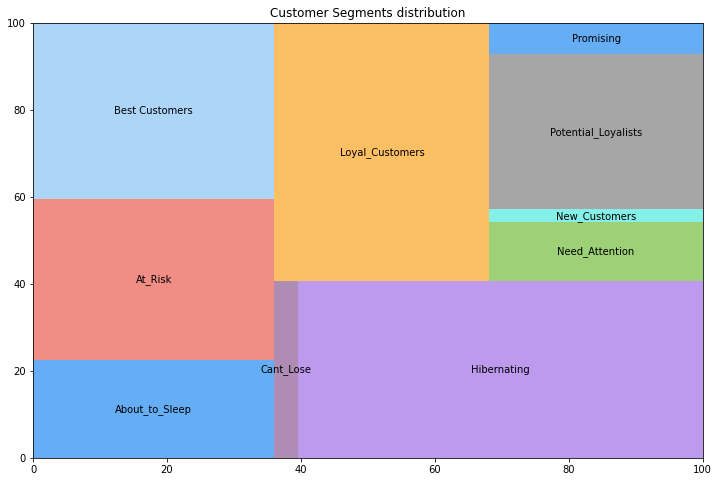

In [33]:
#let's exclude others segment for visualization
segment = list(retail_rfm_segments.Segment)
score = list(retail_rfm_segments.counts)
color_list = ["#248af1", "#eb5d50", "#8bc4f6", "#8c5c94", "#a170e8", "#fba521", "#75bc3f",'#50ebde','#808080']
plt.figure(figsize=(12,8))
plt.title('Customer Segments distribution')
squarify.plot(sizes=score, label=segment,color=color_list, alpha=0.7)

plt.show()